In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('20220208_Final_result.csv')
raw_data.head()

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Terrace surface,Tenement building,Number of frontages,Swimming pool,How many fireplaces?,Garden,Terrace,Surface of the plot,Living area,Garden surface,Garden orientation
0,9729720,APARTMENT,PENTHOUSE,179000,1140,Good,Semi equipped,1.0,Yes,9.0,No,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN
1,9729785,APARTMENT,PENTHOUSE,255000,8370,Good,Installed,1.0,Yes,46.0,No,2.0,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN
2,9729784,APARTMENT,PENTHOUSE,255000,8370,Good,Installed,1.0,Yes,46.0,No,2.0,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN
3,9729780,APARTMENT,PENTHOUSE,620000,8370,Good,Installed,3.0,Yes,70.0,No,2.0,NaN,NaN,NaN,NaN,NaN,150.0,NaN,NaN
4,9727201,APARTMENT,PENTHOUSE,379000,1020,Good,USA hyper equipped,2.0,No,110.0,No,3.0,No,NaN,NaN,NaN,NaN,120.0,NaN,NaN


In [3]:
raw_data.shape

(14541, 20)

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14541 entries, 0 to 14540
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Immoweb ID            14541 non-null  int64  
 1   Property type         14541 non-null  object 
 2   property sub-type     14541 non-null  object 
 3   Price                 14541 non-null  object 
 4   Post code             14541 non-null  int64  
 5   Building condition    9615 non-null   object 
 6   Kitchen type          8587 non-null   object 
 7   Bedrooms              11778 non-null  float64
 8   Furnished             9337 non-null   object 
 9   Terrace surface       5000 non-null   float64
 10  Tenement building     13842 non-null  object 
 11  Number of frontages   9732 non-null   float64
 12  Swimming pool         4378 non-null   object 
 13  How many fireplaces?  871 non-null    float64
 14  Garden                1231 non-null   object 
 15  Terrace            

# Preprocessing

Remove nul price and change data type as float

In [5]:
raw_data = raw_data[pd.to_numeric(raw_data['Price'], errors='coerce').notnull()]
raw_data = raw_data.astype({"Price": float}, errors='raise')

Remove duplicate ID's

In [6]:
raw_data = raw_data.drop_duplicates(['Immoweb ID'], keep='last')

### Exploring the descriptive statistics of the variables

In [7]:
raw_data.describe(include='all')

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Terrace surface,Tenement building,Number of frontages,Swimming pool,How many fireplaces?,Garden,Terrace,Surface of the plot,Living area,Garden surface,Garden orientation
count,1.389300e+04,13893,13893,1.389300e+04,13893.000000,9599,8575,11758.000000,9320,4992.000000,13573,9713.000000,4370,867.000000,1230,2798,6519.000000,11072.000000,2675.000000,2104
unique,NaN,2,20,NaN,NaN,6,8,NaN,2,NaN,2,NaN,2,NaN,1,1,NaN,NaN,NaN,8
top,NaN,HOUSE,VILLA,NaN,NaN,As new,Installed,NaN,No,NaN,No,NaN,No,NaN,Yes,Yes,NaN,NaN,NaN,South
freq,NaN,7699,2468,NaN,NaN,3789,4130,NaN,8730,NaN,10539,NaN,3833,NaN,1230,2798,NaN,NaN,NaN,646
mean,9.502801e+06,NaN,NaN,5.462355e+05,4694.370618,NaN,NaN,3.609117,NaN,35.219151,NaN,2.917533,NaN,1.173010,NaN,NaN,3095.344685,236.687681,1634.743925,NaN
std,3.458473e+05,NaN,NaN,6.817222e+05,3008.748453,NaN,NaN,3.663965,NaN,167.332801,NaN,0.939749,NaN,0.818414,NaN,NaN,16928.272185,314.187169,19659.610744,NaN
min,4.611027e+06,NaN,NaN,9.500000e+02,1000.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,9.473314e+06,NaN,NaN,2.400000e+05,1930.000000,NaN,NaN,2.000000,NaN,11.000000,NaN,2.000000,NaN,1.000000,NaN,NaN,255.000000,102.000000,70.000000,NaN
50%,9.615558e+06,NaN,NaN,3.550000e+05,4000.000000,NaN,NaN,3.000000,NaN,20.000000,NaN,3.000000,NaN,1.000000,NaN,NaN,722.000000,170.000000,214.000000,NaN
75%,9.686662e+06,NaN,NaN,6.000000e+05,7866.000000,NaN,NaN,4.000000,NaN,40.000000,NaN,4.000000,NaN,1.000000,NaN,NaN,1683.500000,281.000000,801.000000,NaN


### Determining the variables of interest

As Fire places and Tenement building has so many missing values, we will drop these columns. We can apply the same for the Garden surface but instead of drop this column we will replace it with new feature (Region)

We also do not use Garden & Terrace surface. These columns will be drop after handeling missing values.

In [8]:
df = raw_data.drop(columns =['Tenement building', 'How many fireplaces?', 'Garden orientation'])

### Dealing with missing values

In [9]:
df.isnull().sum().sort_values(ascending=0)

Garden                 12663
Garden surface         11218
Terrace                11095
Swimming pool           9523
Terrace surface         8901
Surface of the plot     7374
Kitchen type            5318
Furnished               4573
Building condition      4294
Number of frontages     4180
Living area             2821
Bedrooms                2135
Property type              0
Post code                  0
Price                      0
property sub-type          0
Immoweb ID                 0
dtype: int64

#### Building Condition

In [10]:
df['Building condition'].value_counts()
df['Building condition'].unique()

array(['Good', nan, 'As new', 'To renovate', 'To be done up',
       'Just renovated', 'To restore'], dtype=object)

In [11]:
building_condition_map = {'As new': 6, 'Just renovated': 5, 'Good': 4, 'To be done up': 3, 'To renovate':2, 'To restore':1}
df = df.applymap(lambda s: building_condition_map.get(s) if s in building_condition_map else s)

df['Building condition'] = df['Building condition'].fillna(2)
df['Building condition'].isnull().sum()

0

#### Kitchen Type

In [12]:
Kit_type_dict = {"USA uninstalled" : 0, 
                 "Not installed" : 0, 
                 "Installed": 1, 
                 "USA installed": 1,
                 "Semi equipped": 1,
                 "USA semi equipped": 1,
                 "Hyper equipped": 2,
                 "USA hyper equipped": 2
                }

df = df.replace(Kit_type_dict)
df["Kitchen type"] = df["Kitchen type"].fillna(0)

#### Furnished

Fill missing values

In [13]:
df['Furnished'] = df['Furnished'].fillna("No")
df['Furnished'] = df['Furnished'].apply(lambda v: 0 if v == "No" else 1)

#### Bedrooms

Fill missing values with 2 bedrooms

In [14]:
df['Bedrooms'] = df['Bedrooms'].fillna(2).astype(int)

#### Swimming Pool

In [15]:
# Fill missing values with value 0
df['Swimming pool'].fillna(0, inplace = True)
df['Swimming pool'] = df['Swimming pool'].apply(lambda v: 0 if v == "No" else 1)
df['Swimming pool'].isnull().sum()

0

#### Surface of the plot

In [16]:
# Fill empty values with 0
df['Surface of the plot'].fillna(0, inplace = True)

#### Number of Frontages

In [17]:
df_la_no_null = df

In [18]:
#get ['number of frontages'] with values and calc mean
selected_rows = df[~df['Number of frontages'].isnull()]
mean_num_of_frontages = selected_rows['Number of frontages'].mean(axis=0).round(0)
mean_num_of_frontages

3.0

In [19]:
# fill mean value to missing value
df['Number of frontages'] = df['Number of frontages'].fillna(mean_num_of_frontages)
# changing data type as int
df['Number of frontages'] = df['Number of frontages'].astype(int)

#### Garden/Garden Surface & Terrace/Surface

In [20]:
df['Garden'] = df['Garden'].fillna(df['Garden surface'].notnull())
def conv(value : str) -> int:
    if value == False: 
        return 0
    elif value == True:
        return 1
    else:
        return 1

df['Garden'] = df['Garden'].apply(conv)


In [21]:
df['Terrace'] = df['Terrace'].fillna(df['Terrace surface'].notnull())
df['Terrace'] = df['Terrace'].apply(conv)

In [22]:
# As it was mentioned before these columns will not be used for further analysis
df = df.drop(columns =['Garden surface', 'Terrace surface'])

### Creating new Columns

#### Price per m2

In [23]:
df['price/m2'] = (df['Price']/ df['Living area']).round(2)
df.head()

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,Garden,Terrace,Surface of the plot,Living area,price/m2
0,9729720,APARTMENT,PENTHOUSE,179000.0,1140,4.0,1.0,1,1,3,1,0,1,0.0,63.0,2841.27
1,9729785,APARTMENT,PENTHOUSE,255000.0,8370,4.0,1.0,1,1,2,1,0,1,0.0,42.0,6071.43
2,9729784,APARTMENT,PENTHOUSE,255000.0,8370,4.0,1.0,1,1,2,1,0,1,0.0,42.0,6071.43
3,9729780,APARTMENT,PENTHOUSE,620000.0,8370,4.0,1.0,3,1,2,1,0,1,0.0,150.0,4133.33
4,9727201,APARTMENT,PENTHOUSE,379000.0,1020,4.0,2.0,2,0,3,0,0,1,0.0,120.0,3158.33


In [25]:
df.describe()

,Immoweb ID,Price,Post code,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,Garden,Terrace,Surface of the plot,Living area,price/m2
count,1.389300e+04,1.389300e+04,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,13893.000000,11072.000000,11072.000000
mean,9.502801e+06,5.462355e+05,4694.370618,3.764342,0.769308,3.361837,0.042467,2.942345,0.724106,0.281077,0.560714,1452.425826,236.687681,2832.073639
std,3.458473e+05,6.817222e+05,3008.748453,1.636409,0.744092,3.420270,0.201660,0.786659,0.446980,0.449541,0.496318,11697.894538,314.187169,2775.293361
min,4.611027e+06,9.500000e+02,1000.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.860000
25%,9.473314e+06,2.400000e+05,1930.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,102.000000,1785.710000
50%,9.615558e+06,3.550000e+05,4000.000000,4.000000,1.000000,3.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,170.000000,2499.110000
75%,9.686662e+06,6.000000e+05,7866.000000,6.000000,1.000000,4.000000,0.000000,4.000000,1.000000,1.000000,1.000000,649.000000,281.000000,3362.500000
max,9.731707e+06,3.500000e+07,9992.000000,6.000000,2.000000,204.000000,1.000000,16.000000,1.000000,1.000000,1.000000,580608.000000,11000.000000,228500.000000


In [27]:
corr_df = df.drop(columns=['Immoweb ID', 'Post code']) 
corrMat= corr_df.corr().round(2)
corrMat

,Price,Building condition,Kitchen type,Bedrooms,Furnished,Number of frontages,Swimming pool,Garden,Terrace,Surface of the plot,Living area,price/m2
Price,1.00,0.12,0.09,0.34,-0.02,0.15,-0.01,0.06,0.07,0.29,0.52,0.23
Building condition,0.12,1.00,0.41,-0.00,0.09,0.02,-0.23,0.09,0.26,-0.00,-0.04,0.15
Kitchen type,0.09,0.41,1.00,0.00,0.03,0.06,-0.19,0.15,0.33,0.00,-0.04,0.10
Bedrooms,0.34,-0.00,0.00,1.00,-0.00,0.09,0.04,0.08,0.01,0.11,0.47,-0.09
Furnished,-0.02,0.09,0.03,-0.00,1.00,-0.07,-0.09,-0.03,0.00,-0.02,-0.05,0.11
Number of frontages,0.15,0.02,0.06,0.09,-0.07,1.00,0.09,0.14,0.07,0.13,0.15,-0.02
Swimming pool,-0.01,-0.23,-0.19,0.04,-0.09,0.09,1.00,-0.10,-0.14,0.03,0.07,-0.11
Garden,0.06,0.09,0.15,0.08,-0.03,0.14,-0.10,1.00,0.16,0.01,0.06,-0.05
Terrace,0.07,0.26,0.33,0.01,0.00,0.07,-0.14,0.16,1.00,-0.01,-0.05,0.07
Surface of the plot,0.29,-0.00,0.00,0.11,-0.02,0.13,0.03,0.01,-0.01,1.00,0.21,0.03


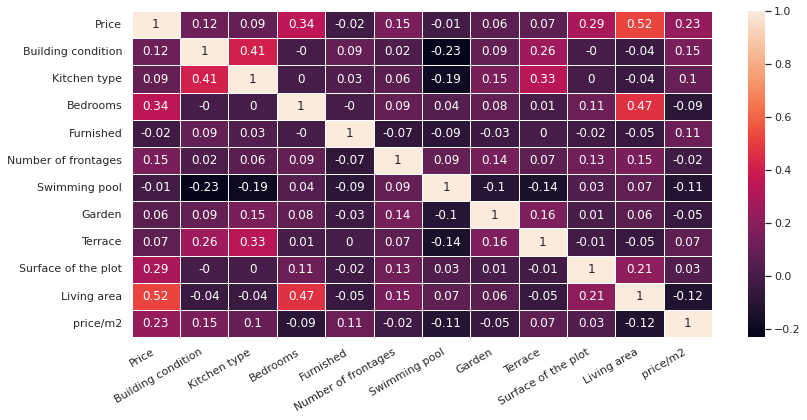

In [28]:
plt.figure(figsize=(13, 6))
sns.heatmap(corrMat, vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

In [29]:
df.drop(['Furnished'], axis = 1)

,Immoweb ID,Property type,property sub-type,Price,Post code,Building condition,Kitchen type,Bedrooms,Number of frontages,Swimming pool,Garden,Terrace,Surface of the plot,Living area,price/m2
0,9729720,APARTMENT,PENTHOUSE,179000.0,1140,4.0,1.0,1,3,1,0,1,0.0,63.0,2841.27
1,9729785,APARTMENT,PENTHOUSE,255000.0,8370,4.0,1.0,1,2,1,0,1,0.0,42.0,6071.43
2,9729784,APARTMENT,PENTHOUSE,255000.0,8370,4.0,1.0,1,2,1,0,1,0.0,42.0,6071.43
3,9729780,APARTMENT,PENTHOUSE,620000.0,8370,4.0,1.0,3,2,1,0,1,0.0,150.0,4133.33
4,9727201,APARTMENT,PENTHOUSE,379000.0,1020,4.0,2.0,2,3,0,0,1,0.0,120.0,3158.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14536,7770552,APARTMENT,SERVICE_FLAT,132000.0,1730,6.0,0.0,1,3,1,0,0,0.0,NaN,NaN
14537,7770553,APARTMENT,SERVICE_FLAT,177000.0,1730,6.0,0.0,1,3,1,0,1,0.0,NaN,NaN
14538,7770551,APARTMENT,SERVICE_FLAT,190000.0,1730,6.0,0.0,2,3,1,0,1,0.0,NaN,NaN
14539,7921693,APARTMENT,SERVICE_FLAT,1350000.0,5600,2.0,0.0,30,3,1,0,0,0.0,1500.0,900.00


In [81]:
df.to_csv("cleaned_data.csv", index=False)